In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

In [5]:
NN = load_model("model.h5")

TypeError: Error when deserializing class 'Dense' using config={'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 32, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'custom_activation', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'custom_activation', 'registered_name': 'function'}

In [ ]:
grid_size = (50, 50)
x_limits = (0, 2)
y_limits = (0, 2)
border_grid_size = (10, 10)

In [ ]:
%matplotlib widget
test_x = np.linspace(x_limits[0], x_limits[1], grid_size[0])
test_y = np.linspace(x_limits[0], x_limits[1], grid_size[1])
test_x, test_y = np.meshgrid(test_x, test_y)

train_u = real_u(x, y)
true_u = real_u(test_x, test_y)
test_coord = np.column_stack((test_x.flatten(), test_y.flatten()))
pred_coord = list()
for _x in x[0]:
    for _y in x[0]:
        pred_coord.append([_x, _y])
pred_u = NN.predict(np.array(pred_coord)).ravel().reshape(grid_size[0], grid_size[1])
ax = plt.figure().add_subplot(projection="3d")
ax.plot_surface(
    test_x,
    test_y,
    true_u,
    edgecolor="royalblue",
    lw=0.5,
    rstride=8,
    cstride=8,
    alpha=0.4,
    # cmap="BuGn",
    facecolor="red",
    label="real"
)
ax.plot_surface(
    x,
    y,
    pred_u,
    edgecolor="royalblue",
    lw=0.5,
    rstride=8,
    cstride=8,
    alpha=0.4,
    # cmap="plasma",
    facecolor="blue",
    label="pred",
)
# ax.scatter(x, y, train_u, s=0.5, label="train")
ax.legend(fontsize=15)
ax.set(xlim=x_limits, ylim=y_limits, xlabel="X", ylabel="Y", zlabel="Z")

(200, 200)


[(0.0, 2.0),
 (0.0, 2.0),
 Text(0.5, 0, 'X'),
 Text(0.5, 0.5, 'Y'),
 Text(0.5, 0, 'Z')]

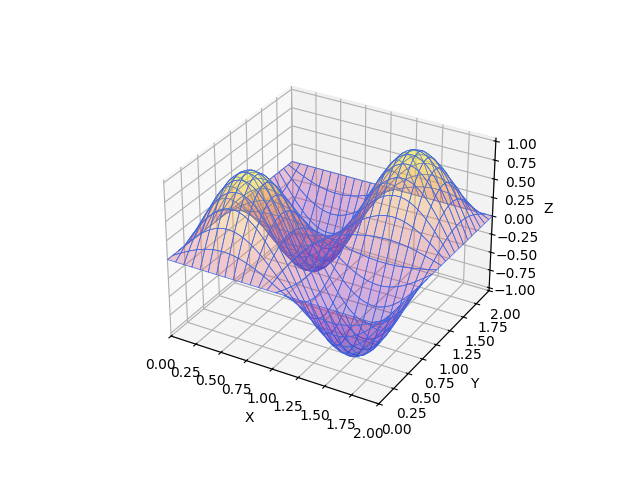

In [2]:
%matplotlib widget

from math import sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np


def f(x, y):
    return -2 * pi ** 2 * np.sin(pi * y) * np.sin(pi * x)
def real_u(x, y):
    return np.sin(pi * x) * np.sin(pi * y)

_x, _y = np.linspace(0, 2, 200), np.linspace(0, 2, 200)
X, Y = np.meshgrid(_x, _y)
z = real_u(X, Y)
print(z.shape)
ax = plt.figure().add_subplot(projection="3d")
ax.plot_surface(X, Y, z, edgecolor="royalblue", lw=0.5, rstride=8, cstride=8, alpha=0.3, cmap="plasma")
ax.set(xlim=(0, 2), ylim=(0, 2),
       xlabel='X', ylabel='Y', zlabel='Z')